## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

## Dataset

In [2]:
dataset = [(1,3.5),(2,1.2),(2.3,1.3),(5,1.9),(6,2.4),(8,3.8)]

## Funções Auxiliares

### Classe Regressão Linear

In [3]:
class LinearRegression:
    '''
        Classe que implementa o algoritmo de Regressão Linear
    '''
    
    def __init__(self):
        self.w = np.zeros(3)

        
    def fit(self,X,y,rlambda=0):
        '''
            Função que calcula os pesos da Regressão Linear
            a partir dos dados de treinamento
            
            w = X'*y
            
            onde X' é a pseudo-inversa de X, dada por:
            X' = (X.T*X)^(-1) * X.T
            
            Este é chamado de one-step learning porque
            tem apenas um passo de aprendizado. 
            Basta resolver o sistema acima para obter os
            valores de w que resolve o sistema Xw = y

            Args:
                X: valores dos dados de treinamento [-1,1] x [-1,1]
                y: labels dos dados de treinamento 
                rlambda: parâmetro usado para regularização da função
                se rlambda = 0, não é aplicada regularização
        '''
        
        # Para encontrar a reta que melhor descreve os pontos, 
        # queremos resolver o seguinte sistema
        # X.T * X * w = X.T * y
        
        # Primeiro multiplicamos X e y por suas matrizes transpostas
        # aqui é usado um operador de matrizes
        A = np.matmul(X.T,X) 
        b = np.matmul(X.T,y)
        
        # Criamos uma matriz de identidade I para regularização
        # caso reg_lambda > 0
        I = np.identity(len(A))
        A = A + rlambda*I
        
        # Para encontrar o vetor w, precisamos resolver o sistema Ax=b
        # vamos usar a seguinte função do Numpy
        self.w = np.linalg.solve(A, b)
    
    def predict(self, X):
        '''
            Realiza a predição de todos os pontos do conjunto de treinamento 
            de acordo com o vetor w

            Args:
                X: pontos do conjunto de treinamento
            Return:
                valor real de acordo com os pesos do modelo
        '''
        return [np.inner(self.w,x) for x in X]

### Funções de Plot

In [4]:
def get_line_plot(x,func):
    '''
        Obtém os valores de y para plot do polinômio de grau len(func)

        Args:
            x: pontos no eixo x
            func: vetor de pesos [w0,w1,w2] correspondente
        Result:
            valores correspondentes aos parâmetros func 
            e x passados como parâmetro
    '''

    # Teste para evitar divisão por zero
    if np.all(func==0):
        return np.zeros(len(x))
    
    # Gera a linha dados os pontos do eixo x
    return [func[i]*x**i for i in range(len(func))]

def plot(X,y_true,h_func,degree,name):
    '''
        Função que "plota" os dados de treinamento junto à hipótese

        Args:
            X: valores dos dados de treinamento [-1,1] x [-1,1]
            Y: labels dos dados de treinamento 
            h_func: função hipótese da regressão linear
            f_target: função target (desconhecida)

    '''

    plt.figure()
    
    # Plota dos dados
    plt.scatter(X,y_true,color='blue', label='Data points')
    
    # Plota a hipótese
    xplt = np.linspace(-1, 10, 100)
    yplt2 = [sum(get_line_plot(x,h_func)) for x in xplt]
    plt.plot(xplt,yplt2,color='red', linestyle='--',label='Hypothesis $h(x)$')
    
    # Plota a função target
    xplt = np.linspace(-1, 10, 100)
    yplt2 = np.exp(2-xplt) + 0.05*((1+xplt)**2)
    plt.plot(xplt,yplt2,color='blue',label='Target function $f(x)$')

    plt.title(f'Degree {degree}')
    
    plt.xlim(0,10)
    plt.ylim(0,10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    plt.savefig(f'figures/{name}_degree_{degree}.pdf')
    plt.show()
    

def plot_error(v_lambdas,Ein,Eout,degree):
    '''
        Função que "plota" as linhas dos erros dentro (Ein) e fora da amostra (Eout)
        segundo os valores de lambda usados na regularização

        Args:
            v_lambdas: valores de lambda usados nos experimentos
            Ein: valores de Ein obtidos para cada valor de lambda
            Eout: valores de Eout obtidos para cada valor de lambda
            degree: grau do polinômio usado na transformação

    '''

    plt.figure()

    # Plota o Ein
    Ein = np.array(Ein)
    plt.plot(v_lambdas,Ein,color='blue',label='E_in')
    
    # Plota o Eout
    Eout = np.array(Eout)
    plt.plot(v_lambdas,Eout,color='red',label='E_out')

    plt.xlabel('lambda')
    plt.ylabel('Error')
    plt.title(f'Degree {degree}')
    plt.legend()
    plt.grid(True)
    
    plt.savefig(f'figures/regularization_degree_{degree}.pdf')
    plt.show()

### Métricas de Desempenho

In [5]:
def get_error(X,y,preds):
    '''
        Calcula o erro quadrático médio de todas as predições

        Args:
            X: pontos (x,y) do conjunto de treinamento
        Return:
            erro quadrático médio
    '''
        
    # Neste problema, temos um valor real como saída,
    # por isso vamos calcular as diferenças 
    # entre os valores de h(x) e f(x)
    # onde h é a hipótese e f a target
    return np.square(np.subtract(y, preds)).mean()

## Códigos da Lista 

In [6]:
def polynomial_expansion(X,degree):
    '''
        Executa a expansão polinomial até um grau passado como parâmetro

        Args:
            X: pontos do conjunto de treinamento
            degree: grau máximo da expansão do polinômio
        Return:
            conjunto de dados expandido
    '''
    return np.array([[x**i for i in range(degree+1)] for x in X])

### Overfitting

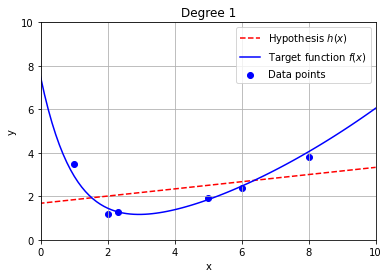

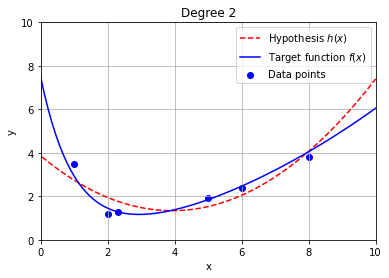

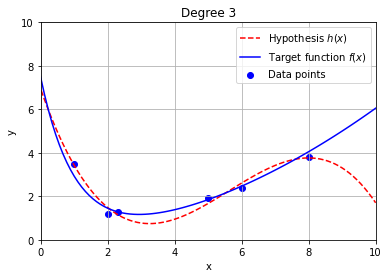

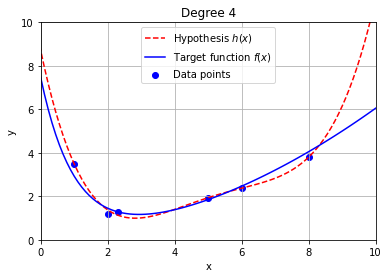

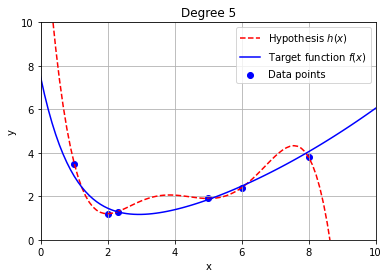

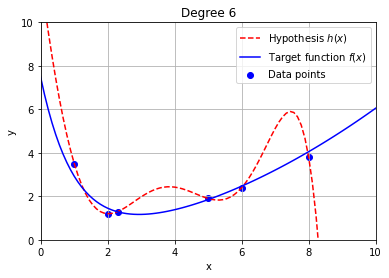

degree_1: {'Ein': 0.8418119774011298, 'Eout': 1.9266415306929254}
degree_2: {'Ein': 0.2812469061721294, 'Eout': 0.37012704667615676}
degree_3: {'Ein': 0.03397722414183661, 'Eout': 3.273386799284045}
degree_4: {'Ein': 0.010093425630924873, 'Eout': 4.295730430070885}
degree_5: {'Ein': 1.7301990305763218e-19, 'Eout': 292.9021000352296}
degree_6: {'Ein': 3.0410047727796565e-19, 'Eout': 3365.1057319791234}


In [7]:
# Pré-processamento do conjunto de treinamento
X,y = [],[]
for d in dataset:
    X.append(d[0])
    y.append(d[1])
    
X,y = np.array(X), np.array(y)

MSE = {}
for i in range(1,7):
    d_transformed = polynomial_expansion(X,i)
    MSE[f'degree_{i}'] = {}
    
    # Inicializa a classe que implementa a Regressão Linear
    model = LinearRegression()
    
    # Treinamento do modelo - one step learning
    model.fit(d_transformed,y)
    
    # Plot da solução encontrada
    plot(X,y,model.w,degree=i,name='overfitting')

    # Uso o modelo pra fazer a predição dos dados dentro da amostra segundo a hipótese
    preds = []
    preds = model.predict(d_transformed)

    # Calculo o erro da função hipótese encontrado pelo algoritmo dentro da amostra
    Ein = get_error(d_transformed,y,preds)

    # Estimativa do erro fora da amostra

    # Primeiro, gero dados fora da amostra usada como treinamento e aplico a mesma transformação
    new_x = np.linspace(1,10,6)
    new_x_transformed = polynomial_expansion(new_x,i)
    
    # Predição usando o modelo e usando a função target
    new_y = np.exp(2-new_x) + 0.05*((1+new_x)**2)
    new_preds = model.predict(new_x_transformed)

    # Calculo o erro da função hipótese encontrado pelo algoritmo fora da amostra
    Eout = get_error(new_x_transformed,new_y,new_preds)
    MSE[f'degree_{i}'] = {'Ein': Ein, 'Eout': Eout}
    del model

for d in MSE:
    print(f'{d}: {MSE[d]}')

### Regularização

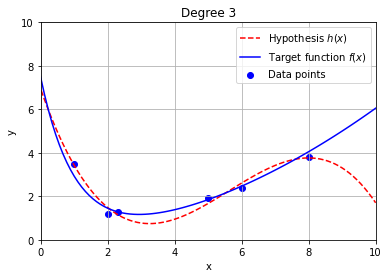

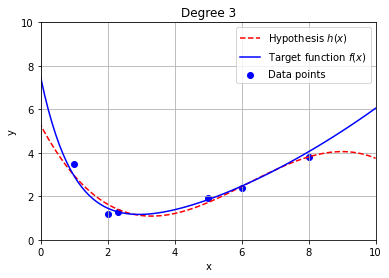

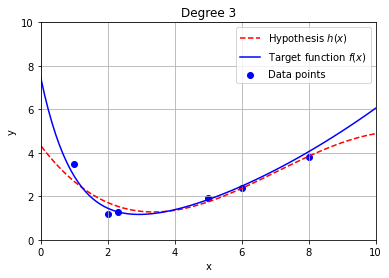

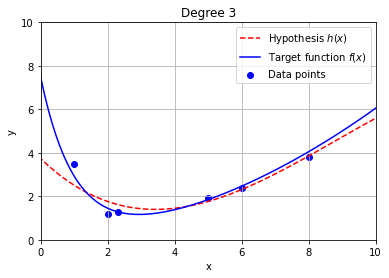

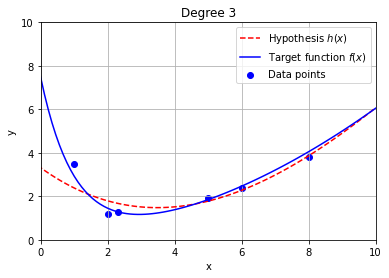

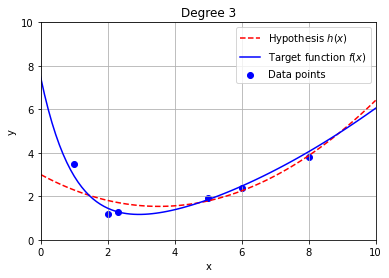

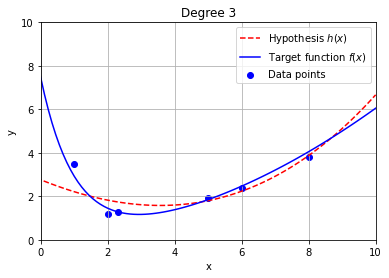

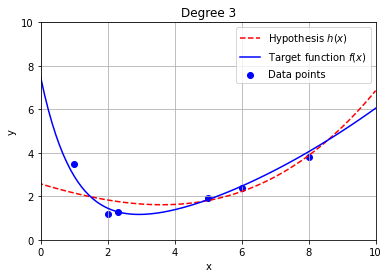

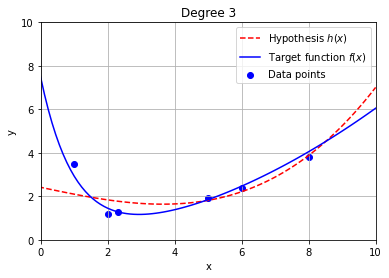

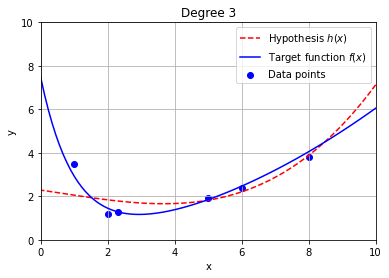

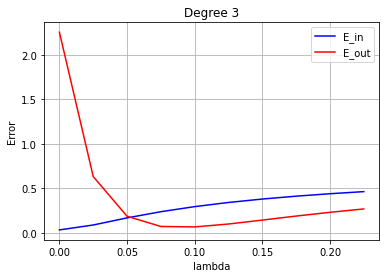

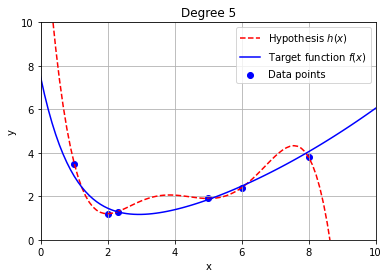

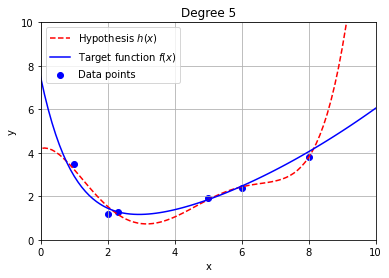

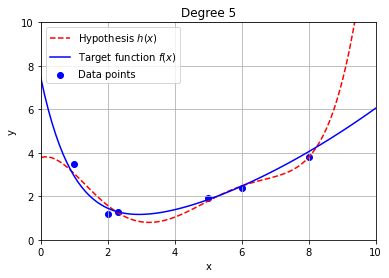

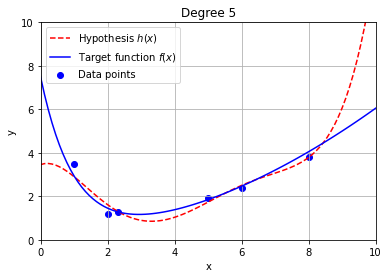

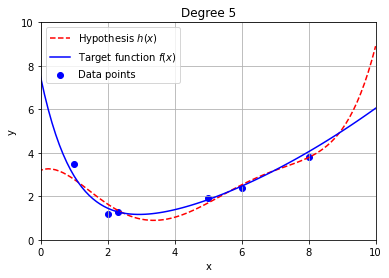

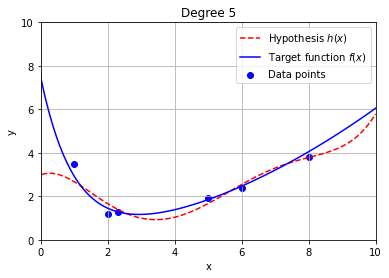

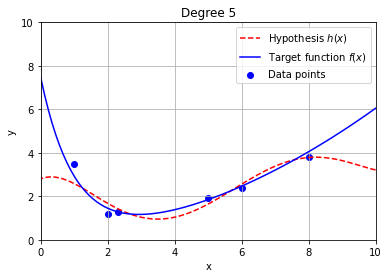

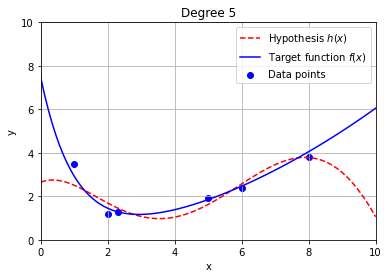

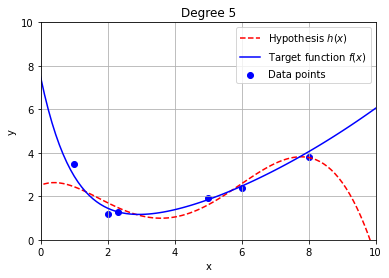

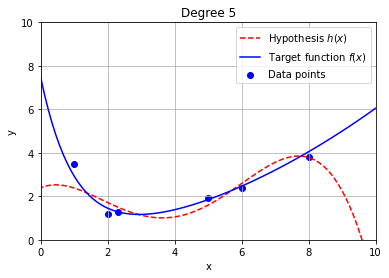

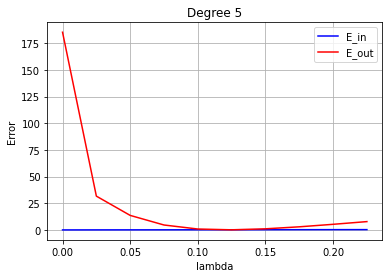

In [8]:
# Pré-processamento do conjunto de treinamento
X,y = [],[]
for d in dataset:
    X.append(d[0])
    y.append(d[1])
    
X,y = np.array(X), np.array(y)

degrees = [3,5]
v_lambdas = [x/1000 for x in range(0,250,25)]

MSE = {}
for i in degrees:
    d_transformed = polynomial_expansion(X,i)
    MSE[f'degree_{i}'] = {'Ein': [], 'Eout': []}
    
    for rlambda in v_lambdas:
    
        # Inicializa a classe que implementa a Regressão Linear
        model = LinearRegression()

        # Treinamento do modelo - one step learning
        model.fit(d_transformed,y,rlambda=rlambda)

        # Plot da solução encontrada
        plot(X,y,model.w,degree=i,name=f'regularization_{rlambda}')

        # Uso o modelo pra fazer a predição dos dados dentro da amostra segundo a hipótese
        preds = []
        preds = model.predict(d_transformed)

        # Calculo o erro da função hipótese encontrado pelo algoritmo dentro da amostra
        Ein = get_error(d_transformed,y,preds)

        # Estimativa do erro fora da amostra

        # Primeiro, gero dados fora da amostra usada como treinamento e aplico a mesma transformação
        new_x = np.linspace(1,10,10)
        new_x_transformed = polynomial_expansion(new_x,i)

        # Predição usando o modelo e usando a função target
        new_y = np.exp(2-new_x) + 0.05*((1+new_x)**2)
        new_preds = model.predict(new_x_transformed)

        # Calculo o erro da função hipótese encontrado pelo algoritmo fora da amostra
        Eout = get_error(new_x_transformed,new_y,new_preds)
        
        MSE[f'degree_{i}']['Ein'].append(Ein)
        MSE[f'degree_{i}']['Eout'].append(Eout)
        
        del model

    plot_error(v_lambdas,MSE[f'degree_{i}']['Ein'],MSE[f'degree_{i}']['Eout'],degree=i)

In [10]:
MSE['degree_5']

{'Ein': [1.7301990305763218e-19,
  0.03437102814124675,
  0.0620278437810508,
  0.09523107053927853,
  0.12978176382932954,
  0.16369586700692507,
  0.19607210998404978,
  0.22654903701136153,
  0.2550369341339939,
  0.28158122930717405],
 'Eout': [185.41872845794114,
  31.688505555459336,
  13.617415493704456,
  4.607542114737317,
  0.8496444591503118,
  0.0936768451803548,
  1.0367601672730167,
  2.9111177013725342,
  5.2571081143354705,
  7.797080760822551]}